In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ai_client
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *
from src.agents.news_filtering_agent import *
from src.agents.trading_agent import *
from src.agents.supervisor_trader import SupervisorTrader
from src.agents.marginal_agent import MarginalAgent
from src.agents.supervisor_margin_trader import SupervisorMarginTrader

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
coin = "DOGE"

cutoff = get_current_datetime()
str(cutoff)

'2024-04-22 02:11:58.221665'

In [32]:
day_history = get_day_history(coin, cutoff)
week_history = get_week_history(coin, cutoff)
month_history = get_month_history(coin, cutoff)
year_history = get_year_history(coin, cutoff)

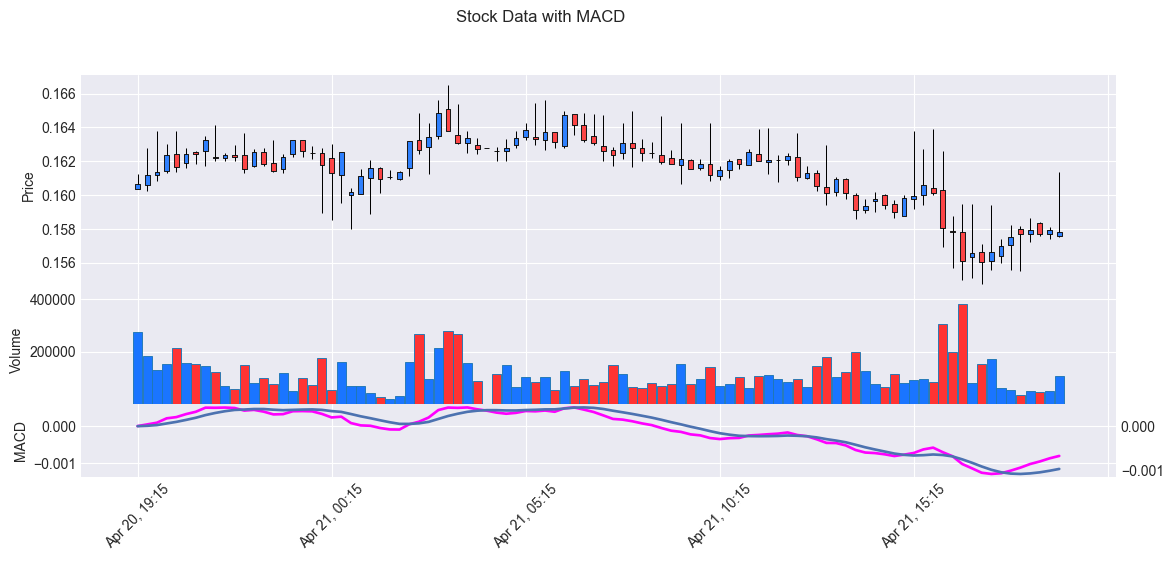

In [33]:
make_candlebars(day_history)

In [28]:
napi = NewsApi()
trading_agent = SupervisorMarginTrader()
filtering_agent = NewsFilteringAgent()

In [29]:
news = napi.get_news(coin, start_date=subtract_time(cutoff, days=10), end_date=cutoff)
filtered_news = filtering_agent.filter_news(news)
json.loads(filtered_news)

{'headlines': "Toncoin Inches Closer to Dogecoin's Market Cap, Surges by 42% in Past Week",
 'sentiment': 'Positive',
 'description': "Toncoin (TON), the open source blockchain built on Telegram, has shown a rapid increase, surging by 42% over the past week as it approaches the market capitalization of Dogecoin, a leading memecoin. This significant surge positions Toncoin prominently in the competitive crypto market. Analysts and crypto enthusiasts are keenly watching Toncoin's performance, speculating on its potential to challenge major players in the cryptocurrency space."}

In [35]:
balance = {coin: 0, "USDT": 1000}
operations_history = []

[{'role': 'system', 'content': "You are professional futures trader with an extensive understanding of cryptocurrency markets. \n                \n                Respond with JSON of described format.\n                Guidelines:\n                - Do not buy on everything you have, distribute spendings!\n                - Feel free to sell all if selling improves total net_worth of acccount\n                - Consider historical market data and recent news.\n                - Use only money from your 'balance'\n                \n                Your ultimate goal is to make make as much profit as possible\n                "}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last day. Current price: 0.15782'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'high'}}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last week'}, {'type': 'image_url', 'image_url': {'url': '', 'deta
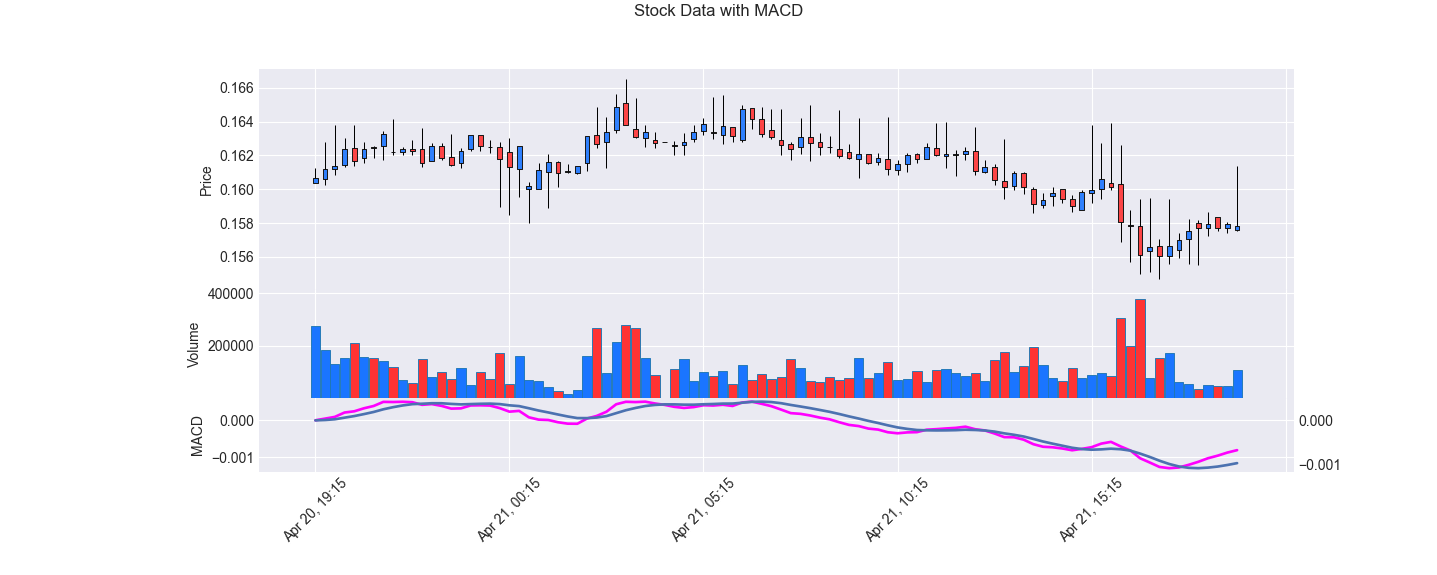
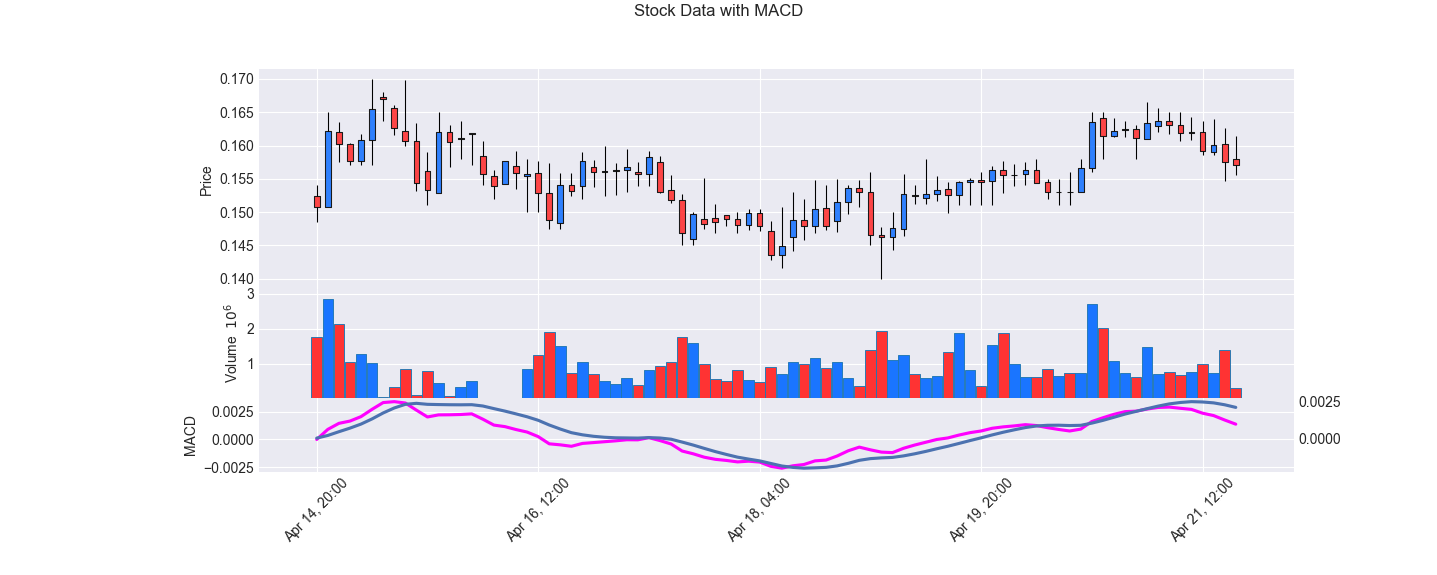
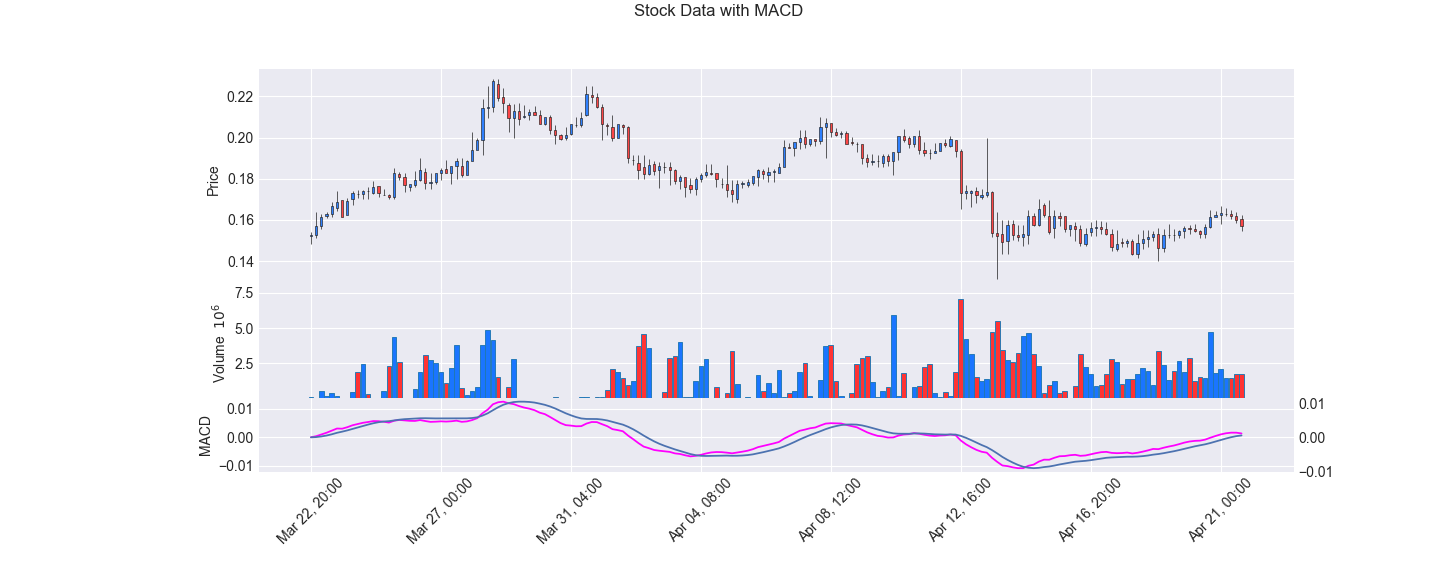

{'strategy_evaluation': 'The decision to hold based on the current analysis is sensible given the absence of strong directional trends and the narrow margin between current price, predicted threats, and potential gains. This conservative approach aligns with risk management principles especially in a market showing weak signals.',
 'calculations_evaluation': "The calculations for potential profits or losses in both buying and selling futures were hypothetical, assuming small moves in price. However, these were not quantitatively detailed in the previous response and hence might seem vague. Without specific percentages or expected return figures, it's hard to gauge true profitability.",
 'changes_description': 'More quantitative details should be added to provide a clearer picture of the expected returns from both buying and selling futures, to better compare with the hold scenario. This would include specifying expected percentage gains relative to the investment and adjusting leverage

In [37]:
predict, _ = trading_agent.decide(
    coin=coin,
    news=filtered_news,
    day_data=day_history,
    week_data=week_history,
    month_data=month_history,
    #year_data=year_history,
    operations_history=operations_history,
    current_balance=balance,
    leverage="6x",
    verbose=True,
)

result = json.loads(predict)
result